<a href="https://colab.research.google.com/github/Chaithra12237/Program/blob/master/Tomato_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 33.2 MB/s 


In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155460 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
os.chdir('/content/drive/MyDrive/New Plant Diseases ')
os.listdir()

['train', 'val', '.ipynb_checkpoints', 'best_model.h5']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Model

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
train = datagen.flow_from_directory('./train', seed=123, subset='training')
val = datagen.flow_from_directory('./train', seed=123, subset='validation')

datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test = datagen2.flow_from_directory('./val')

Found 12845 images belonging to 10 classes.
Found 5500 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


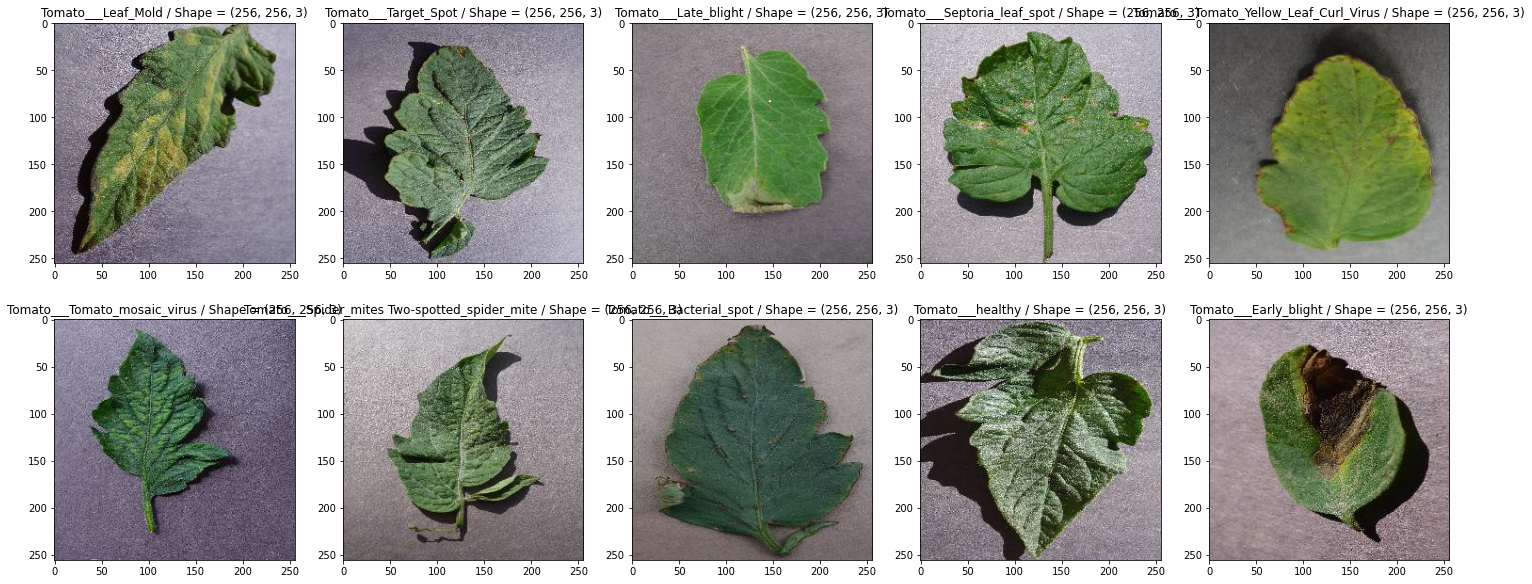

In [ ]:
classes = os.listdir('./train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image = Image.open('./train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [ ]:
def get_model():
    
    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
    
    for layers in base_model.layers[:140]:
        layers.trainable = False
    for layers in base_model.layers[140:]:
        layers.trainable = True
        
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [ ]:
model = get_model()
model.summary()

234561536/234545216 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)
mc = ModelCheckpoint(filepath="best_model.h5", 
                     monitor= 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only=True)
cb= [es,mc]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
his=model.fit(train, batch_size=32, epochs=5, validation_data=val,callbacks = cb)

Epoch 1/5
402/402 [==============================] - ETA: 0s - loss: 0.4498 - accuracy: 0.8647 
Epoch 1: val_accuracy improved from -inf to 0.94418, saving model to best_model.h5
402/402 [==============================] - 9823s 24s/step - loss: 0.4498 - accuracy: 0.8647 - val_loss: 0.1631 - val_accuracy: 0.9442
Epoch 2/5
402/402 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9868
Epoch 2: val_accuracy improved from 0.94418 to 0.96018, saving model to best_model.h5
402/402 [==============================] - 659s 2s/step - loss: 0.0501 - accuracy: 0.9868 - val_loss: 0.1149 - val_accuracy: 0.9602
Epoch 3/5
402/402 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9962
Epoch 3: val_accuracy improved from 0.96018 to 0.96764, saving model to best_model.h5
402/402 [==============================] - 626s 2s/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 0.0938 - val_accuracy: 0.9676
Epoch 4/5
402/402 [==============================] - ETA: 0s 

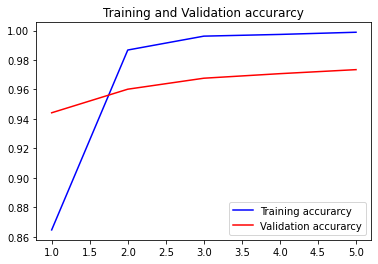

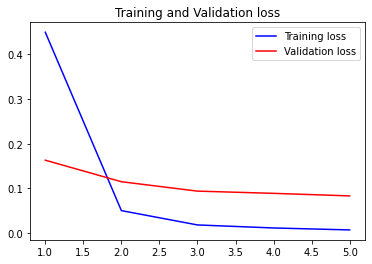

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
print("Calculating model accuracy")
scores = model.evaluate(test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
144/144 [==============================] - 2387s 17s/step - loss: 0.0594 - accuracy: 0.9788
Test Accuracy: 97.88440465927124


Tomato - Septoria Leaf Spot


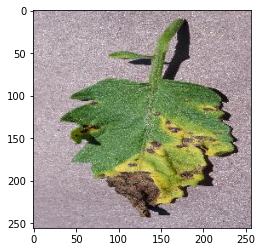

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/New Plant Diseases /val/Tomato___Septoria_leaf_spot/02ab6821-757a-401b-ac04-919fdceee1f0___Matt.S_CG 1653_flipTB.JPG')
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

preds = np.argmax(preds, axis=1)

if preds==0:
  print("Tomato - Bacterial Spot")
elif preds==1:
  print("Tomato - Early Blight")
elif preds==2:
  print("Tomato - Late Blight")
elif preds==3:
  print("Tomato - Leaf Mold")
elif preds==4:
  print("Tomato - Septoria Leaf Spot")
elif preds==5:
  print("Tomato - Spider Mites Two-spotted Spider Mite")
elif preds==6:
  print("Tomato - Target Spot")
elif preds==7:
  print("Tomato - Tomato_Yellow_Leaf_Curl_Virus")
elif preds==8:
  print("Tomato - Tomato Mosaic Virus")
else:
  print("Tomato - Healthy ") 

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/New Plant Diseases /best_model.h5")

In [ ]:
import os.path
if os.path.isfile('/content/drive/MyDrive/New Plant Diseases /best_model.h5') is False:
  model.save('/content/drive/MyDrive/New Plant Diseases /best_model.h5')